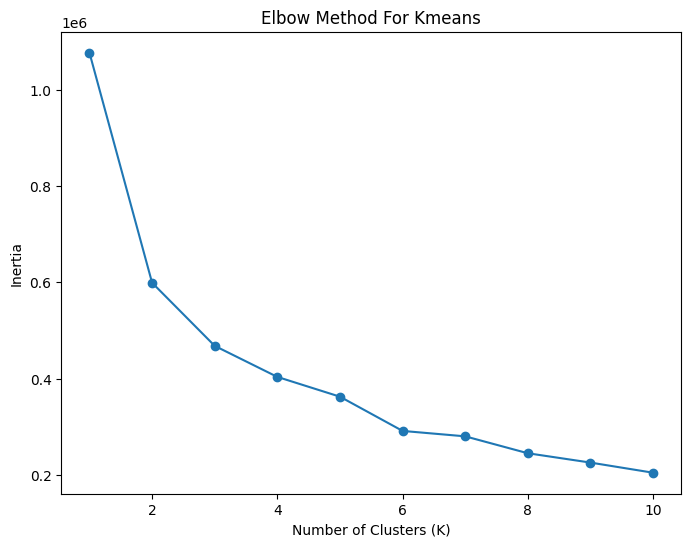

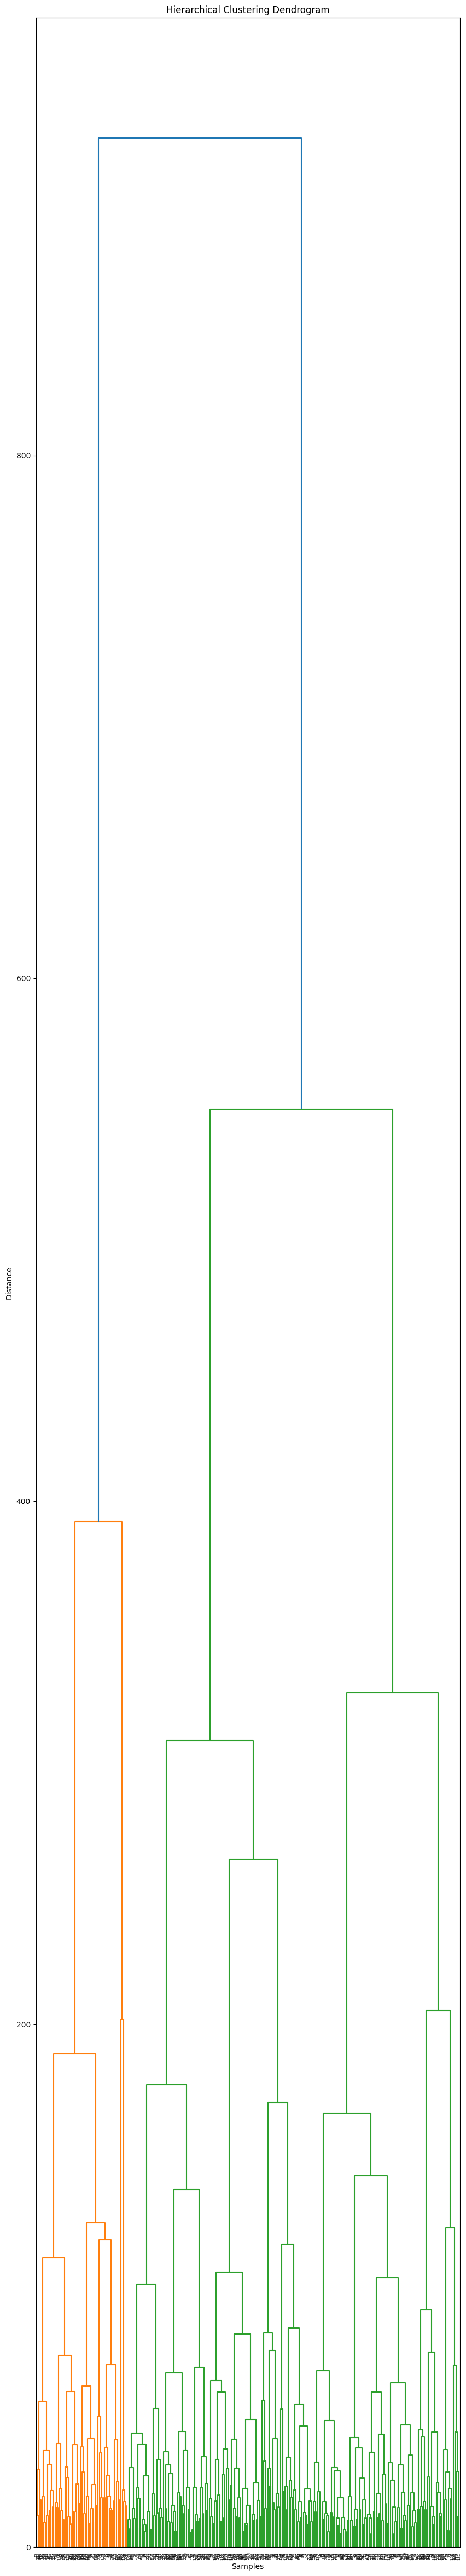

num               0   1   2   3  4
KMeans_Cluster                    
0               110  31  19  18  8
1                50  23  16  17  5
num           0   1   2   3  4
HC_Cluster                    
0           128  42  25  29  9
1            32  12  10   6  4


In [10]:
import pandas as pd 
from sklearn.cluster import KMeans , AgglomerativeClustering
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram , linkage

df = pd.read_csv("../data/heart_disease.csv")
x =df.drop('num',axis =1)
y = df['num']

inertia=[]
K_range = range(1,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k , random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker ="o")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Kmeans')
plt.savefig("../results/Elbow_Method_For_Kmeans.png")

plt.show()

kmeans = KMeans(n_clusters=2, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(x)

linked = linkage(x, method='ward')
plt.figure(figsize=(10,60))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.savefig("../results/Hierarchical_Clustering_Dendrogram.png")

plt.show()

hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
df['HC_Cluster'] = hc.fit_predict(x)

print(pd.crosstab(df['KMeans_Cluster'], df['num']))
print(pd.crosstab(df['HC_Cluster'], df['num']))